In [1]:


import json
import os
import sys
import tomllib
import re
import pandas as pd
import evaluate
import sys
import os
import json
from argparse import ArgumentParser
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from spacy.lang.it.examples import sentences
import matplotlib.pyplot as plt
import pandas as pd
import scipy

result_path = "/Users/micheleyin/Documents/Elicitation/LLMs-runner/results/cleaned_dataset/stripped"
human_path = "/Users/micheleyin/Documents/Elicitation/LLMs-runner/results/cleaned_dataset/stripped/first_experiment/oracle.json"


In [2]:
# list all files in directory recursively
def list_files(path):
    r = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if name.endswith(".json"):
                r.append(os.path.join(root, name))
    return r
input_files = list_files(result_path)
input_files.sort()
input_files

['/Users/micheleyin/Documents/Elicitation/LLMs-runner/results/cleaned_dataset/stripped/first_experiment/Wizard-Vicuna-13B-Uncensored-HF.json',
 '/Users/micheleyin/Documents/Elicitation/LLMs-runner/results/cleaned_dataset/stripped/first_experiment/falcon-40b-instruct.json',
 '/Users/micheleyin/Documents/Elicitation/LLMs-runner/results/cleaned_dataset/stripped/first_experiment/falcon-7b.json',
 '/Users/micheleyin/Documents/Elicitation/LLMs-runner/results/cleaned_dataset/stripped/first_experiment/gpt-3.5-turbo.json',
 '/Users/micheleyin/Documents/Elicitation/LLMs-runner/results/cleaned_dataset/stripped/first_experiment/gpt-4.json',
 '/Users/micheleyin/Documents/Elicitation/LLMs-runner/results/cleaned_dataset/stripped/first_experiment/mpt-30b-chat.json',
 '/Users/micheleyin/Documents/Elicitation/LLMs-runner/results/cleaned_dataset/stripped/first_experiment/mpt-7b.json',
 '/Users/micheleyin/Documents/Elicitation/LLMs-runner/results/cleaned_dataset/stripped/first_experiment/oracle.json',
 '/

In [3]:
def retrieve_data(input_files, with_prompt=False):
    models_data = {}
    for file in input_files:
        with open(file,'rb') as f:
            data = json.load(f)
        model_name = data[0]["model_name"]
        models_data[model_name] = model_name
        narratives = data[0]["results"]
        inputs = []
        answers = []
        for narrative in narratives:
            try:
                input_text = " ".join(narrative["input"].split()) + " "
                text = " ".join(narrative["output"][0]["generated_text"].split()).strip()
                text = text.replace("'", "",1)
                text = text.replace('"', "",1)
                text = text.replace('-', "",1)
                text = text.replace('”', "",1)
                text = text.replace('“', "",1)
                text = text.replace('’', "",1)
                text = text.replace('*', "",1)
                text = text.replace('1.', "",1)
                text = text.replace('a.', "",1)
                text = text.replace('a)', "",1)
                text = re.split(r'([.?])', text)
                try: 
                    text = text[0] + text[1]
                except IndexError:
                    text = text[0]
                text = text.trim()
            except TypeError:
                print(f"input text is not a string: {narrative}")
            if with_prompt:
                answer = text[text.find(input_text)+len(input_text)+len(' DOMANDA:'):].strip()
                # split by period, question mark, exclamation mark and keep the punctuation
                answer = re.split(r'([.!?])', answer)
                try:
                    answer = answer[0] + answer[1]
                except IndexError:
                    answer = answer[0]
            else:
                answer = text
            inputs.append(input_text)
            answers.append(answer)
        models_data[model_name] = {"inputs": inputs, "answers": answers}
    return models_data

In [4]:
def retrieve_human_data(input_files):
    models_data = {}
    for file in input_files:
        with open(file,'rb') as f:
            data = json.load(f)
        model_name = data[0]["model_name"]
        models_data[model_name] = model_name
        narratives = data[0]["results"]
        inputs = []
        answers = []
        for narrative in narratives:
            input_text = " ".join(narrative["input"].split()) + " "
            answer = [i["generated_text"] for i in narrative["output"]]
            inputs.append(input_text)
            answers.append(answer)
        models_data[model_name] = {"inputs": inputs, "answers": answers}
    return models_data

In [5]:
# models_data
human_data = retrieve_human_data([human_path])
human_data

{'oracle': {'inputs': ["Jennifer aveva un esame importante il giorno dopo. Era così stressata che passò la notte in bianco. Il giorno dopo era andata in classe, stanca morta. L'insegnante le comunicò che l'esame è rimandato alla settimana successiva. ",
   'Morgan e la sua famiglia vivevano in Florida. Avevano sentito che stava arrivando un uragano. Decisero di evacuare a casa di un parente. Arrivarono e appresero dal telegiornale che si trattava di una terribile tempesta. ',
   'Tina aveva preparato gli spaghetti per il suo ragazzo. Ci era voluto molto lavoro, ma lei era molto orgogliosa. Il suo ragazzo mangiò tutto il piatto e disse che era buono. Tina assaggiò e si rese conto che era disgustoso. ',
   "Il mio professore assegnò alla mia classe un tema. Tempo di uscire dall'aula e me ne ero già dimenticata. Qualche giorno dopo, una mia compagna di classe mi scrisse per chiedermi se l'avessi fatto. Ero così arrabbiata con me stessa perché me ne ero completamente dimenticata. ",
   'Ka

In [6]:
def retrieve_data(input_files, with_prompt=False):
    models_data = {}
    for file in input_files:
        with open(file,'rb') as f:
            data = json.load(f)
        model_name = data[0]["model_name"]
        models_data[model_name] = model_name
        narratives = data[0]["results"]
        inputs = []
        answers = []
        unprocessed = []
        for narrative in narratives:
            try:
                input_text = " ".join(narrative["input"].split()) + " "
                # print (narrative["output"][0]["generated_text"])
                unprocessed.append(narrative["output"][0]["generated_text"])
                text = " ".join(narrative["output"][0]["generated_text"].split()).strip()
                text = text.replace("'", "",1)
                text = text.replace('"', "",1)
                text = text.replace('-', "",1)
                text = text.replace('”', "",1)
                text = text.replace('“', "",1)
                text = text.replace('’', "",1)
                text = text.replace('*', "",1)
                text = text.replace('1.', "",1)
                text = text.replace('a.', "",1)
                text = text.replace('a)', "",1)
                text = re.split(r'([.?])', text)
                try: 
                    text = text[0] + text[1]
                except IndexError:
                    text = text[0]
                # print (text)
            except TypeError:
                print(f"input text is not a string: {narrative}")
            if with_prompt:
                answer = text[text.find(input_text)+len(input_text)+len(' DOMANDA:'):].strip()
                # split by period, question mark, exclamation mark and keep the punctuation
                answer = re.split(r'([.])', answer)
                try:
                    answer = answer[0] + answer[1]
                except IndexError:
                    answer = answer[0]
            else:
                answer = text
            inputs.append(input_text)
            answers.append(answer)
        models_data[model_name] = {"inputs": inputs, "answers": answers, "unprocessed": unprocessed}
    return models_data
    
def model_data_whole(input_files):
    model_data = {}
    for file in input_files:
        a = retrieve_data([file], with_prompt=False)
        # print (a)
        a = a[list(a.keys())[0]]
        '0_shot/falcon-7b.json'
        model_name = file.split('/')[-1].split('.')[0]
        shot = file.split('/')[-2]
        try:
            model_data[shot][model_name] = a
        except KeyError:
            try:
                model_data[shot] = {model_name: a}
            except KeyError:

                model_data = {shot: {model_name: a}}
    return model_data

In [7]:
models_data = model_data_whole(input_files)
models_data
df = pd.DataFrame.from_dict({(i): models_data[i]
                            for i in models_data.keys() },
                          orient='index')   
df

Wizard-Vicuna-13B-Uncensored-HF  \
first_experiment   {'inputs': ['Jennifer aveva un esame important...   
second_experiment  {'inputs': ['Jennifer aveva un esame important...   
third_experiment   {'inputs': ['Prendi in considerazione i seguen...   

                                                 falcon-40b-instruct  \
first_experiment   {'inputs': ['Jennifer aveva un esame important...   
second_experiment  {'inputs': ['Jennifer aveva un esame important...   
third_experiment   {'inputs': ['Prendi in considerazione i seguen...   

                                                           falcon-7b  \
first_experiment   {'inputs': ['Jennifer aveva un esame important...   
second_experiment  {'inputs': ['Jennifer aveva un esame important...   
third_experiment   {'inputs': ['Jennifer aveva un esame important...   

                                                               gpt-3  \
first_experiment   {'inputs': ['Jennifer aveva un esame important...   
second_experiment  {'inputs': ['Jennifer aveva un esame important...   
third_experiment   {'inputs': ['Jennifer aveva un esame important...   

                                                               gpt-4  \
first_experiment   {'inputs': ['Jennifer aveva un esame important...   
second_experiment  {'inputs': ['Jennifer aveva un esame important...   
third_experiment   {'inputs': ['Jennifer aveva un esame important...   

                                                        mpt-30b-chat  \
first_experiment   {'inputs': ['Jennifer aveva un esame important...   
second_experiment  {'inputs': ['Jennifer aveva un esame important...   
third_experiment   {'inputs': ['Prendi in considerazione i seguen...   

                                                              mpt-7b  \
first_experiment   {'inputs': ['Jennifer aveva un esame important...   
second_experiment  {'inputs': ['Jennifer aveva un esame important...   
third_experiment   {'inputs': ['Prendi in considerazione i seguen...   

                                                              oracle  \
first_experiment   {'inputs': ['Jennifer aveva un esame important...   
second_experiment  {'inputs': ['Jennifer aveva un esame important...   
third_experiment   {'inputs': ['Jennifer aveva un esame important...   

                                                       vicuna-13b-v1  \
first_experiment   {'inputs': ['Jennifer aveva un esame important...   
second_experiment  {'inputs': ['Jennifer aveva un esame important...   
third_experiment   {'inputs': ['Prendi in considerazione i seguen...   

                                                       vicuna-33b-v1  
first_experiment   {'inputs': ['Jennifer aveva un esame important...  
second_experiment  {'inputs': ['Jennifer aveva un esame important...  
third_experiment   {'inputs': ['Prendi in considerazione i seguen...

In [8]:
# bleu 
import math
from torchmetrics.text import BLEUScore
ngram = 1
bleu = BLEUScore(n_gram=ngram)
def compute_bleu(models_data,human_data):
    bleu_scores = []
    # if models data is NAN, then return NAN
    if models_data is None or models_data is np.nan:
        return np.nan
    # print (models_data)
    for i in range(len(models_data["inputs"])):
        input_text = models_data["inputs"][i]
        answer = [models_data["answers"][i]]
        
        human_answer = human_data["oracle"]["answers"][i]

            # print(f"index {i} is out of range")
            # exit()
        # print (f"human answer is {human_answer} and model answer is {answer}")
        bleu_score = bleu(answer, [human_answer])
        bleu_scores.append(bleu_score.item())
    # print (bleu_scores)
    bleu_scores =  sum(bleu_scores)/len(bleu_scores)
    # bleu_scores = {k: max(v) for k, v in bleu_scores.items()}
    return bleu_scores

In [9]:
models_data = model_data_whole(input_files)
models_data
df = pd.DataFrame.from_dict({(i): models_data[i]
                            for i in models_data.keys() },
                          orient='index')   
df = df.applymap(lambda x: x['answers'][17] if isinstance(x, dict) else x)
df.rename(columns={'Wizard-Vicuna-13B-Uncensored-HF':'Wizard Vicuna 13B Uncensored HF'}, inplace=True)
df.rename(columns={'falcon-7b': 'Falcon 7B'}, inplace=True)
df.rename(columns={'falcon-40b-instruct':'Falcon 40B Instruct'}, inplace=True)
df.rename(columns={'gpt-3': 'Gpt 3'}, inplace=True)
df.rename(columns={'gpt-4': 'Gpt 4'}, inplace=True)
df.rename(columns={'mpt-7b': 'Mpt 7B'}, inplace=True)
df.rename(columns={'mpt-30b-chat': 'Mpt 30B Chat'}, inplace=True)
df.rename(columns={'oracle': 'Oracle'}, inplace=True)
df.rename(columns={'vicuna-13b-v1': 'Vicuna 13B V1'}, inplace=True)
df.rename(columns={'vicuna-33b-v1': 'Vicuna 33B V1'}, inplace=True)
import natsort
# df.drop(columns=['Oracle'], inplace=True)
df = df.reindex(natsort.natsorted(df.columns), axis=1).T
df.to_latex('examples.tex')
df
# styler = df.applymap(lambda x: compute_bleu(x,human_data)).style.background_gradient(cmap='Blues').format("{:.2f}")
# styler.to_latex('Chelsea.tex', convert_css=True, hrules=True, position_float="centering",
#     caption="Switching to Hypothesis' state-machines made.")
# styler

first_experiment  \
Falcon 7B                          Quale problema medico potrebbe aver avuto Ch...   
Falcon 40B Instruct               After Chelsea got hurt playing basketball, sh...   
Gpt 3                             Chelsea era una ragazza coraggiosa, ma quando...   
Gpt 4                             Nonostante il dolore, Chelsea cercò di nascon...   
Mpt 7B                                          Che cos'è il sintomo che hai oggi?   
Mpt 30B Chat                                                                     .   
Oracle                            Il medico fu in grado di fornirle le cure nec...   
Vicuna 13B V1                        Quali parole potrebbero completare la storia?   
Vicuna 33B V1                      Scrivi una frase utilizzando la parola 'frat...   
Wizard Vicuna 13B Uncensored HF   Cosa potrebbe esser successo a causa del gioc...   

                                                                 second_experiment  \
Falcon 7B                         'A Chelsea piace giocare a basket, ma dopo l'...   
Falcon 40B Instruct               Chelsea e la sua famiglia rimasero scioccati ...   
Gpt 3                             Chelsea si sentì sollevata nel sapere finalme...   
Gpt 4                             Chelsea fu sollevata di aver ascoltato suo pa...   
Mpt 7B                            Dopo l'operazione, Chelsea andò al mio giardino.   
Mpt 30B Chat                      Il padre di Chelsea era grato di averle fatto...   
Oracle                            Il medico fu in grado di fornirle le cure nec...   
Vicuna 13B V1                     Quanto tempo ha impiegato Chelsea per guarire...   
Vicuna 33B V1                     Chelsea è stata costretta a stare fuori dal c...   
Wizard Vicuna 13B Uncensored HF   Inizialmente Chelsea provò un grande dolore, ...   

                                                                  third_experiment  
Falcon 7B                         Chelsea era felice di avere un padre che la c...  
Falcon 40B Instruct              Le dita di Chelsea guarirono, ma lei imparerà ...  
Gpt 3                             Chelsea si sentì sollevata di aver ascoltato ...  
Gpt 4                             Chelsea fu sollevata di aver ascoltato suo pa...  
Mpt 7B                           Chelsey doveva andare allospedale per la chiro...  
Mpt 30B Chat                     Chelsea aveva la pelle doca quando uscì dal me...  
Oracle                            Il medico fu in grado di fornirle le cure nec...  
Vicuna 13B V1                    La madre di Chelsea era in attesa a casa per p...  
Vicuna 33B V1                    Chelsea fece una radiografia e ricevette un ge...  
Wizard Vicuna 13B Uncensored HF  Il dottore le fece una fessa e le applicò un b...

In [10]:
models_data = model_data_whole(input_files)
models_data
df = pd.DataFrame.from_dict({(i): models_data[i]
                            for i in models_data.keys() },
                          orient='index')   
# df.drop(columns=['mpt-7b','mpt-30b-chat'], inplace=True)
# df.drop(index=[('no_color','no_guidelines','0_shot')], inplace=True)
# df.drop(index=[('no_color','no_guidelines','1_shot')], inplace=True)
# df.drop(index=[('no_color','with_guidelines','0_shot')], inplace=True)
# df.drop(index=[('no_color','with_guidelines','1_shot')], inplace=True)
# df.drop(index=[('with_color','no_guidelines','0_shot')], inplace=True)
# df.drop(index=[('with_color','no_guidelines','1_shot')], inplace=True)
# df.drop(index=[('with_color','with_guidelines','0_shot')], inplace=True)
# df.drop(index=[('with_color','with_guidelines','1_shot')], inplace=True)
df.rename(columns={'Wizard-Vicuna-13B-Uncensored-HF':'Wizard Vicuna 13B Uncensored HF'}, inplace=True)
df.rename(columns={'falcon-7b': 'Falcon 7B'}, inplace=True)
df.rename(columns={'falcon-40b-instruct':'Falcon 40B Instruct'}, inplace=True)
df.rename(columns={'gpt-3': 'Gpt 3'}, inplace=True)
df.rename(columns={'gpt-4': 'Gpt 4'}, inplace=True)
df.rename(columns={'mpt-7b': 'Mpt 7B'}, inplace=True)
df.rename(columns={'mpt-30b-chat': 'Mpt 30B Chat'}, inplace=True)
df.rename(columns={'oracle': 'Oracle'}, inplace=True)
df.rename(columns={'vicuna-13b-v1': 'Vicuna 13B V1'}, inplace=True)
df.rename(columns={'vicuna-33b-v1': 'Vicuna 33B V1'}, inplace=True)
import natsort
df.drop(columns=['Oracle'], inplace=True)
df = df.reindex(natsort.natsorted(df.columns), axis=1).T
styler = df.applymap(lambda x: compute_bleu(x,human_data)).style.background_gradient(cmap='Blues',  axis=None ).format("{:.2f}")
styler.to_latex('bleu.tex', convert_css=True, hrules=True, position_float="centering",
    caption="Switching to Hypothesis' state-machines made.")
styler


In [11]:
import evaluate
meteor = evaluate.load('meteor')
def compute_meteor(models_data,human_data):
    meteor_scores = []
        # if models data is NAN, then return NAN
    if models_data is None or models_data is np.nan:
        return np.nan
    meteor_scores = []
    for i in range(len(models_data["inputs"])):
        input_text = models_data["inputs"][i]
        answer = [models_data["answers"][i]]
        human_answer = human_data["oracle"]["answers"][i]
        # print (f"human answer is {human_answer} and model answer is {answer}")
        # meteor_scores= meteor.compute(answer, human_answer)
        meteor_score = meteor.compute(predictions=answer, references=[human_answer])['meteor']   
        meteor_scores.append(meteor_score)
    meteor_scores =  sum(meteor_scores)/len(meteor_scores)
    # meteor_scores = {k: max(v) for k, v in meteor_scores.items()}
    return meteor_scores

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/micheleyin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/micheleyin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/micheleyin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [12]:
models_data = model_data_whole(input_files)
models_data
df = pd.DataFrame.from_dict({(i): models_data[i]
                            for i in models_data.keys() },
                          orient='index')   
# df
df.rename(columns={'Wizard-Vicuna-13B-Uncensored-HF':'Wizard Vicuna 13B Uncensored HF'}, inplace=True)
df.rename(columns={'falcon-7b': 'Falcon 7B'}, inplace=True)
df.rename(columns={'falcon-40b-instruct':'Falcon 40B Instruct'}, inplace=True)
df.rename(columns={'gpt-3': 'Gpt 3'}, inplace=True)
df.rename(columns={'gpt-4': 'Gpt 4'}, inplace=True)
df.rename(columns={'mpt-7b': 'Mpt 7B'}, inplace=True)
df.rename(columns={'mpt-30b-chat': 'Mpt 30B Chat'}, inplace=True)
df.rename(columns={'oracle': 'Oracle'}, inplace=True)
df.rename(columns={'vicuna-13b-v1': 'Vicuna 13B V1'}, inplace=True)
df.rename(columns={'vicuna-33b-v1': 'Vicuna 33B V1'}, inplace=True)
import natsort
df.drop(columns=['Oracle'], inplace=True)
df = df.reindex(natsort.natsorted(df.columns), axis=1).T
styler = df.applymap(lambda x: compute_bleu(x,human_data)).style.background_gradient(cmap='Reds',  axis=None ).format("{:.2f}")
styler.to_latex('meteor.tex', convert_css=True, hrules=True, position_float="centering",
    caption="Switching to Hypothesis' state-machines made.")
styler

In [13]:
def token_count(models_data):
        # if models data is NAN, then return NAN
    if models_data is None or models_data is np.nan:
        return np.nan
    counts = 0
    for i in range(len(models_data["inputs"])):
        answer = [models_data["answers"][i]]
        counts += len(answer[0].split())
    return counts/len(models_data["inputs"])
def token_count_std(models_data):
        # if models data is NAN, then return NAN
    if models_data is None or models_data is np.nan:
        return np.nan
    counts = []
    for i in range(len(models_data["inputs"])):
        answer = [models_data["answers"][i]]
        counts.append(len(answer[0].split()))
    return np.std(counts)

In [14]:
models_data = model_data_whole(input_files)
models_data
df = pd.DataFrame.from_dict({(i): models_data[i]
                            for i in models_data.keys() },
                          orient='index')   
df.rename(columns={'Wizard-Vicuna-13B-Uncensored-HF':'Wizard Vicuna 13B Uncensored HF'}, inplace=True)
df.rename(columns={'falcon-7b': 'Falcon 7B'}, inplace=True)
df.rename(columns={'falcon-40b-instruct':'Falcon 40B Instruct'}, inplace=True)
df.rename(columns={'gpt-3': 'Gpt 3'}, inplace=True)
df.rename(columns={'gpt-4': 'Gpt 4'}, inplace=True)
df.rename(columns={'mpt-7b': 'Mpt 7B'}, inplace=True)
df.rename(columns={'mpt-30b-chat': 'Mpt 30B Chat'}, inplace=True)
df.rename(columns={'oracle': 'Oracle'}, inplace=True)
df.rename(columns={'vicuna-13b-v1': 'Vicuna 13B V1'}, inplace=True)
df.rename(columns={'vicuna-33b-v1': 'Vicuna 33B V1'}, inplace=True)
import natsort
# df.drop(columns=['Oracle'], inplace=True)
df = df.reindex(natsort.natsorted(df.columns), axis=1).T
# print(f"human reference token count is average token answer: 10.421052631578947")
df = df.applymap(lambda x:  token_count(x))
df_len = df
styler = df.style.background_gradient(cmap='RdPu',  axis=None ).format("{:.2f}")
styler.to_latex('token length.tex', convert_css=True, hrules=True, position_float="centering",
    caption="Switching to Hypothesis' state-machines made.")
styler

In [15]:
models_data = model_data_whole(input_files)
models_data
df = pd.DataFrame.from_dict({(i): models_data[i]
                            for i in models_data.keys() },
                          orient='index')   
df.rename(columns={'Wizard-Vicuna-13B-Uncensored-HF':'Wizard Vicuna 13B Uncensored HF'}, inplace=True)
df.rename(columns={'falcon-7b': 'Falcon 7B'}, inplace=True)
df.rename(columns={'falcon-40b-instruct':'Falcon 40B Instruct'}, inplace=True)
df.rename(columns={'gpt-3': 'Gpt 3'}, inplace=True)
df.rename(columns={'gpt-4': 'Gpt 4'}, inplace=True)
df.rename(columns={'mpt-7b': 'Mpt 7B'}, inplace=True)
df.rename(columns={'mpt-30b-chat': 'Mpt 30B Chat'}, inplace=True)
df.rename(columns={'oracle': 'Oracle'}, inplace=True)
df.rename(columns={'vicuna-13b-v1': 'Vicuna 13B V1'}, inplace=True)
df.rename(columns={'vicuna-33b-v1': 'Vicuna 33B V1'}, inplace=True)
import natsort
# df.drop(columns=['Oracle'], inplace=True)
df = df.reindex(natsort.natsorted(df.columns), axis=1).T
# print(f"human reference token count is average token answer: 10.421052631578947")
df = df.applymap(lambda x:  token_count_std(x))
df_std = df
styler = df.style.background_gradient(cmap='BuGn',  axis=None ).format("{:.2f}")
styler.to_latex('token std.tex', convert_css=True, hrules=True, position_float="centering",
    caption="Switching to Hypothesis' state-machines made.")
styler
# df.applymap(lambda x:  token_count_std(x)).style.background_gradient(cmap='YlOrRd').format("{:.2f}")

In [24]:
df = pd.concat([df_len, df_std], axis=1, keys = ['length', 'std'])
# display(df)
styler = df.style.background_gradient(cmap='RdPu', axis=None, subset=pd.IndexSlice['length']
                            ).background_gradient(cmap='BuGn', axis=None, subset=pd.IndexSlice['std']
                            ).format(precision=2)
styler.to_latex('length-std.tex', convert_css=True, hrules=True, position_float="centering")
styler

In [16]:
# count null answers
def null_answers_count(models_data):
    counts = 0
    if models_data is None or models_data is np.nan:
        return np.nan
    for i in range(len(models_data["inputs"])):
        answer = re.split(r'([.])', models_data["answers"][i])
        try: 
            answer = answer[0] + answer[1]
        except IndexError:
            answer = answer[0]
        answer = answer.strip()
        # if answer == "":
        #     counts += 1
        if len(answer) < 5:
            counts += 1
    # counts = counts/len(models_data["inputs"])
    return counts
models_data = model_data_whole(input_files)
models_data
df = pd.DataFrame.from_dict({(i): models_data[i]
                            for i in models_data.keys() },
                          orient='index')   
df.rename(columns={'Wizard-Vicuna-13B-Uncensored-HF':'Wizard Vicuna 13B Uncensored HF'}, inplace=True)
df.rename(columns={'falcon-7b': 'Falcon 7B'}, inplace=True)
df.rename(columns={'falcon-40b-instruct':'Falcon 40B Instruct'}, inplace=True)
df.rename(columns={'gpt-3': 'Gpt 3'}, inplace=True)
df.rename(columns={'gpt-4': 'Gpt 4'}, inplace=True)
df.rename(columns={'mpt-7b': 'Mpt 7B'}, inplace=True)
df.rename(columns={'mpt-30b-chat': 'Mpt 30B Chat'}, inplace=True)
df.rename(columns={'oracle': 'Oracle'}, inplace=True)
df.rename(columns={'vicuna-13b-v1': 'Vicuna 13B V1'}, inplace=True)
df.rename(columns={'vicuna-33b-v1': 'Vicuna 33B V1'}, inplace=True)
import natsort
df.drop(columns=['Oracle'], inplace=True)
df = df.reindex(natsort.natsorted(df.columns), axis=1).T
# print(f"human reference token count is average token answer: 10.421052631578947")
styler = df.applymap(lambda x:  null_answers_count(x)/50).style.background_gradient(cmap='pink_r',  axis=None ).format("{:.2f}")
styler.to_latex('null answers.tex', convert_css=True, hrules=True, position_float="centering",
    caption="Switching to Hypothesis' state-machines made.")
styler
# df.applymap(lambda x: null_answers_count(x)).style.background_gradient(cmap='Greens').format("{:.2f}")

In [17]:
# count null answers
def token_overlap(models_data):
    bleu_score = 0
    if models_data is None or models_data is np.nan:
        return np.nan
    for i in range(len(models_data["inputs"])):
        answer = re.split(r'([?])', models_data["answers"][i])
        try: 
            answer = answer[0] + answer[1]
        except IndexError:
            answer = answer[0]
        answer = answer.strip()
        input_text = models_data["inputs"][i]
        # print (input_text)
        bleu_score += bleu([answer], [[input_text]])
    return bleu_score/len(models_data["inputs"])
models_data = model_data_whole(input_files)
models_data
df = pd.DataFrame.from_dict({(i): models_data[i]
                            for i in models_data.keys() },
                          orient='index')   
df.applymap(lambda x: token_overlap(x)).style.background_gradient(cmap='Reds').format("{:.2f}")

In [18]:
from torchmetrics.text import ROUGEScore

# from pprint import pprint as print

rouge = ROUGEScore()


def dict_sum(a: dict, b: dict):
    c = {}
    for k, v in a.items():
        try:
            c[k] = v + b[k]
        except KeyError:
            c[k] = v
    return c


def divide_dict(a: dict, div: int):
    c = {}
    for k, v in a.items():
        c[k] = v / div
    return c


def average_dict(a: dict):
    c = 0
    for k, v in a.items():
        c += v
    if len(a) == 0:
        return c
    return c / len(a)
def compute_rogue(models_data,human_data):
    rouge_scores = {}
    # if models data is NAN, then return NAN
    if models_data is None or models_data is np.nan:
        return np.nan
    # print (models_data)
    for i in range(len(models_data["inputs"])):
        input_text = models_data["inputs"][i]
        answer = [models_data["answers"][i]]
        
        human_answer = human_data["oracle"]["answers"][i]

            # print(f"index {i} is out of range")
            # exit()
        # print (f"human answer is {human_answer} and model answer is {answer}")
        rouge_score = rouge(answer, human_answer)
        # print (rouge_score)
        rouge_scores = dict_sum(rouge_score, rouge_scores)
        # print (rouge_scores)
    # print (rouge_scores)
    # print (rouge_scores)
    rouge_scores =  divide_dict(rouge_scores, len(models_data["inputs"]))
    # rouge_scores = {k: max(v) for k, v in rouge_scores.items()}
    return rouge_scores
models_data = model_data_whole(input_files)
models_data
df = pd.DataFrame.from_dict({(i): models_data[i]#['rouge1_fmeasure']
                            for i in models_data.keys() },
                          orient='index')   
# df
df.rename(columns={'Wizard-Vicuna-13B-Uncensored-HF':'Wizard Vicuna 13B Uncensored HF'}, inplace=True)
df.rename(columns={'falcon-7b': 'Falcon 7B'}, inplace=True)
df.rename(columns={'falcon-40b-instruct':'Falcon 40B Instruct'}, inplace=True)
df.rename(columns={'gpt-3': 'Gpt 3'}, inplace=True)
df.rename(columns={'gpt-4': 'Gpt 4'}, inplace=True)
df.rename(columns={'mpt-7b': 'Mpt 7B'}, inplace=True)
df.rename(columns={'mpt-30b-chat': 'Mpt 30B Chat'}, inplace=True)
df.rename(columns={'oracle': 'Oracle'}, inplace=True)
df.rename(columns={'vicuna-13b-v1': 'Vicuna 13B V1'}, inplace=True)
df.rename(columns={'vicuna-33b-v1': 'Vicuna 33B V1'}, inplace=True)
import natsort
df.drop(columns=['Oracle'], inplace=True)
df = df.reindex(natsort.natsorted(df.columns), axis=1).T
styler = df.applymap(lambda x: compute_rogue(x,human_data)["rouge1_fmeasure"].item())
styler = styler.style.background_gradient(cmap='Greens', axis=None ).format("{:.2f}")
styler.to_latex('rouge f1.tex', convert_css=True, hrules=True, position_float="centering",
    caption="Switching to Hypothesis' state-machines made.")
styler

In [19]:
models_data = model_data_whole(input_files)
models_data
df = pd.DataFrame.from_dict({(i): models_data[i]#['rouge1_fmeasure']
                            for i in models_data.keys() },
                          orient='index')   
# df
df.rename(columns={'Wizard-Vicuna-13B-Uncensored-HF':'Wizard Vicuna 13B Uncensored HF'}, inplace=True)
df.rename(columns={'falcon-7b': 'Falcon 7B'}, inplace=True)
df.rename(columns={'falcon-40b-instruct':'Falcon 40B Instruct'}, inplace=True)
df.rename(columns={'gpt-3': 'Gpt 3'}, inplace=True)
df.rename(columns={'gpt-4': 'Gpt 4'}, inplace=True)
df.rename(columns={'mpt-7b': 'Mpt 7B'}, inplace=True)
df.rename(columns={'mpt-30b-chat': 'Mpt 30B Chat'}, inplace=True)
df.rename(columns={'oracle': 'Oracle'}, inplace=True)
df.rename(columns={'vicuna-13b-v1': 'Vicuna 13B V1'}, inplace=True)
df.rename(columns={'vicuna-33b-v1': 'Vicuna 33B V1'}, inplace=True)
import natsort
df.drop(columns=['Oracle'], inplace=True)
df = df.reindex(natsort.natsorted(df.columns), axis=1).T
styler = df.applymap(lambda x: compute_rogue(x,human_data)["rouge1_recall"].item())
styler = styler.style.background_gradient(cmap='Oranges', axis=None ).format("{:.2f}")
styler.to_latex('rouge recall.tex', convert_css=True, hrules=True, position_float="centering",
    caption="Switching to Hypothesis' state-machines made.")
styler

In [20]:
models_data = model_data_whole(input_files)
models_data
df = pd.DataFrame.from_dict({(i): models_data[i]#['rouge1_fmeasure']
                            for i in models_data.keys() },
                          orient='index')   
# df
df.rename(columns={'Wizard-Vicuna-13B-Uncensored-HF':'Wizard Vicuna 13B Uncensored HF'}, inplace=True)
df.rename(columns={'falcon-7b': 'Falcon 7B'}, inplace=True)
df.rename(columns={'falcon-40b-instruct':'Falcon 40B Instruct'}, inplace=True)
df.rename(columns={'gpt-3': 'Gpt 3'}, inplace=True)
df.rename(columns={'gpt-4': 'Gpt 4'}, inplace=True)
df.rename(columns={'mpt-7b': 'Mpt 7B'}, inplace=True)
df.rename(columns={'mpt-30b-chat': 'Mpt 30B Chat'}, inplace=True)
df.rename(columns={'oracle': 'Oracle'}, inplace=True)
df.rename(columns={'vicuna-13b-v1': 'Vicuna 13B V1'}, inplace=True)
df.rename(columns={'vicuna-33b-v1': 'Vicuna 33B V1'}, inplace=True)
import natsort
df.drop(columns=['Oracle'], inplace=True)
df = df.reindex(natsort.natsorted(df.columns), axis=1).T
styler = df.applymap(lambda x: compute_rogue(x,human_data)["rouge1_precision"].item())
styler = styler.style.background_gradient(cmap='Purples', axis=None ).format("{:.2f}")
styler.to_latex('rouge precision.tex', convert_css=True, hrules=True, position_float="centering",
    caption="Switching to Hypothesis' state-machines made.")
styler

magma


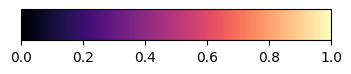

inferno


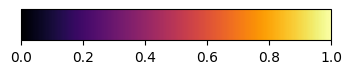

plasma


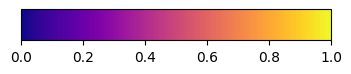

viridis


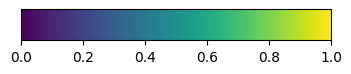

cividis


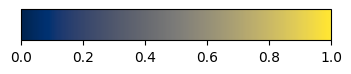

twilight


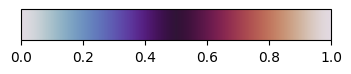

twilight_shifted


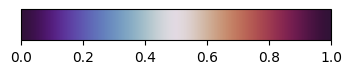

turbo


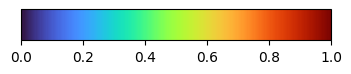

Blues


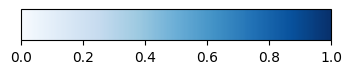

BrBG


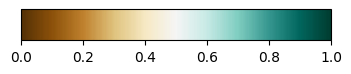

BuGn


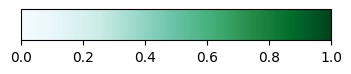

BuPu


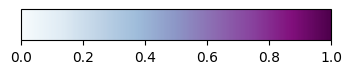

CMRmap


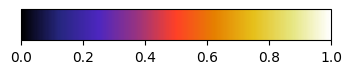

GnBu


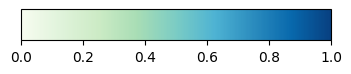

Greens


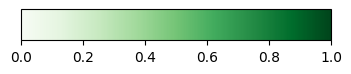

Greys


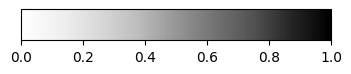

OrRd


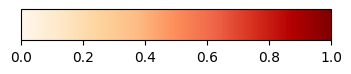

Oranges


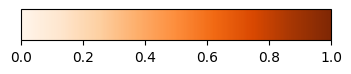

PRGn


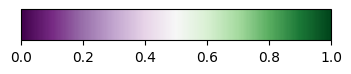

PiYG


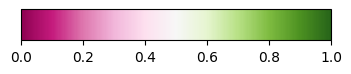

PuBu


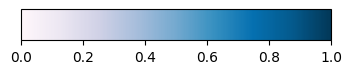

PuBuGn


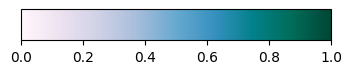

PuOr


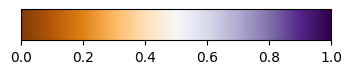

PuRd


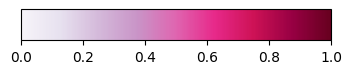

Purples


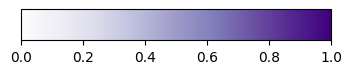

RdBu


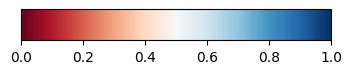

RdGy


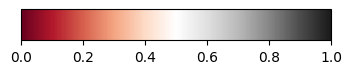

RdPu


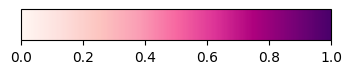

RdYlBu


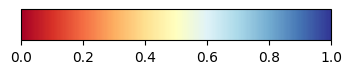

RdYlGn


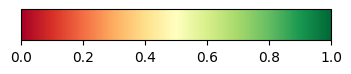

Reds


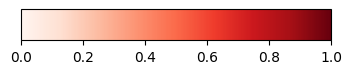

Spectral


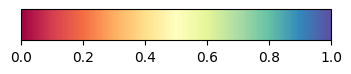

Wistia


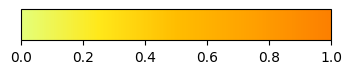

YlGn


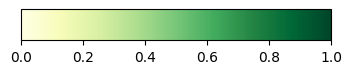

YlGnBu


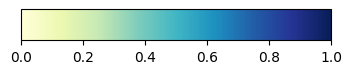

YlOrBr


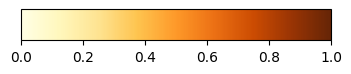

YlOrRd


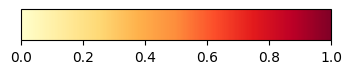

afmhot


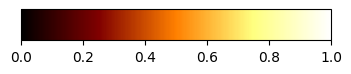

autumn


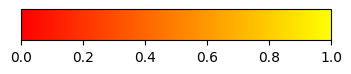

binary


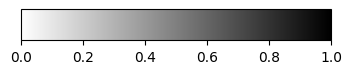

bone


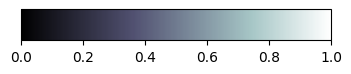

brg


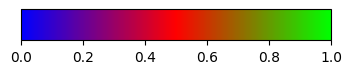

bwr


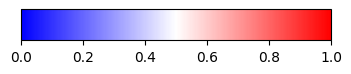

cool


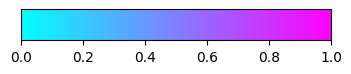

coolwarm


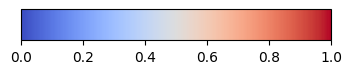

copper


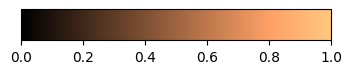

cubehelix


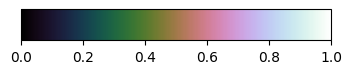

flag


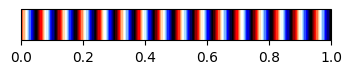

gist_earth


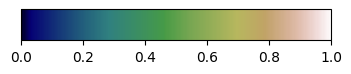

gist_gray


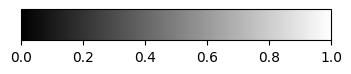

gist_heat


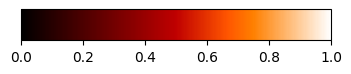

gist_ncar


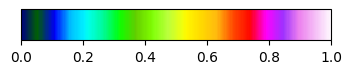

gist_rainbow


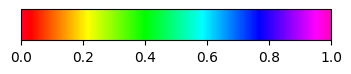

gist_stern


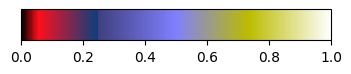

gist_yarg


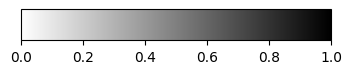

gnuplot


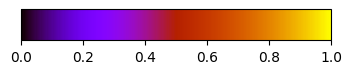

gnuplot2


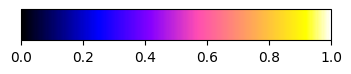

gray


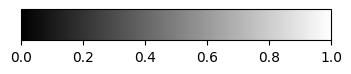

hot


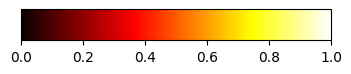

hsv


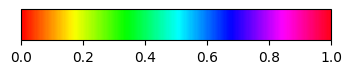

jet


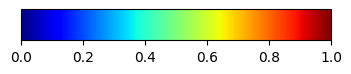

nipy_spectral


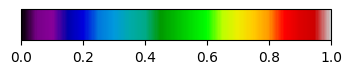

ocean


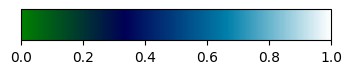

pink


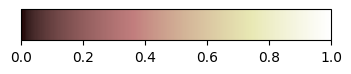

prism


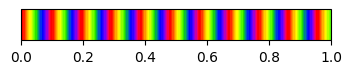

rainbow


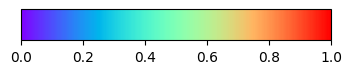

seismic


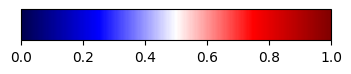

spring


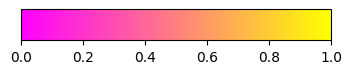

summer


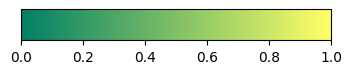

terrain


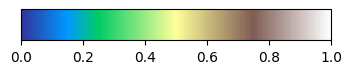

winter


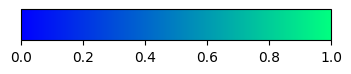

Accent


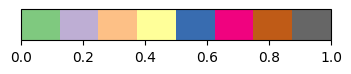

Dark2


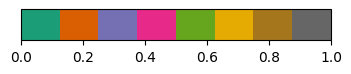

Paired


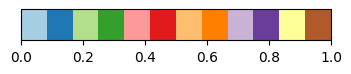

Pastel1


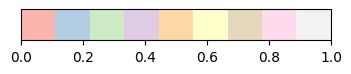

Pastel2


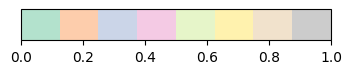

Set1


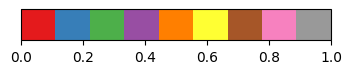

Set2


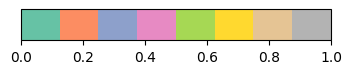

Set3


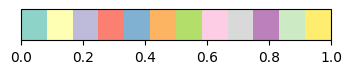

tab10


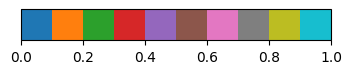

tab20


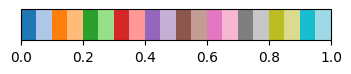

tab20b


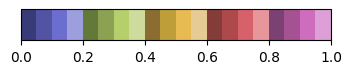

tab20c


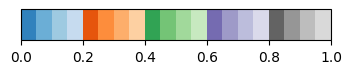

magma_r


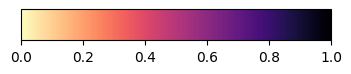

inferno_r


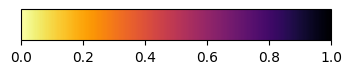

plasma_r


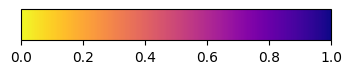

viridis_r


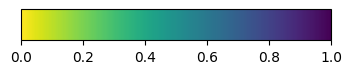

cividis_r


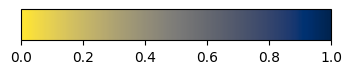

twilight_r


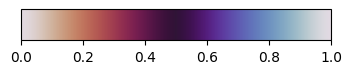

twilight_shifted_r


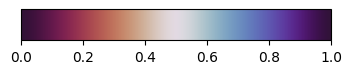

turbo_r


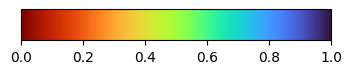

Blues_r


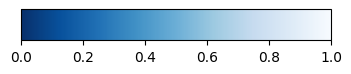

BrBG_r


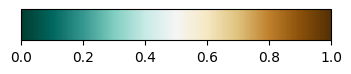

BuGn_r


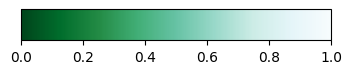

BuPu_r


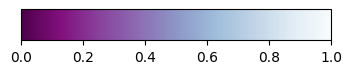

CMRmap_r


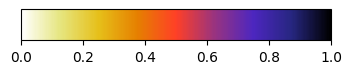

GnBu_r


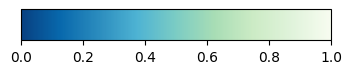

Greens_r


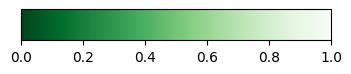

Greys_r


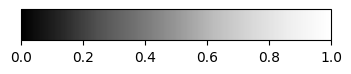

OrRd_r


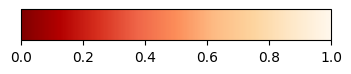

Oranges_r


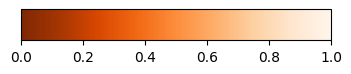

PRGn_r


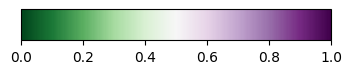

PiYG_r


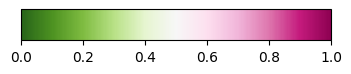

PuBu_r


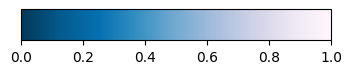

PuBuGn_r


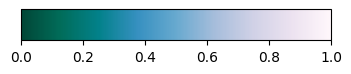

PuOr_r


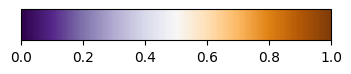

PuRd_r


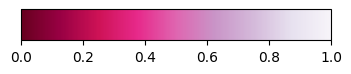

Purples_r


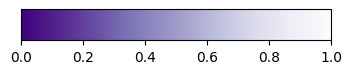

RdBu_r


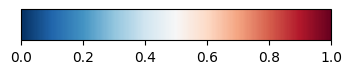

RdGy_r


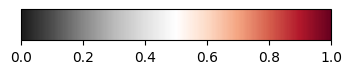

RdPu_r


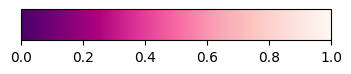

RdYlBu_r


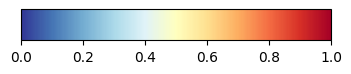

RdYlGn_r


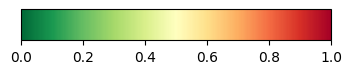

Reds_r


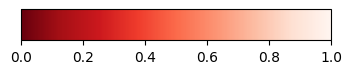

Spectral_r


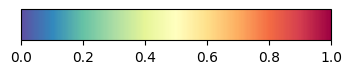

Wistia_r


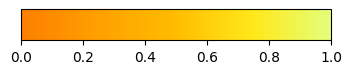

YlGn_r


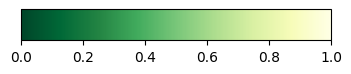

YlGnBu_r


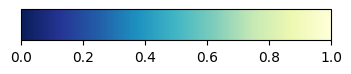

YlOrBr_r


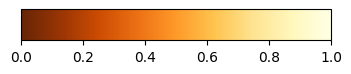

YlOrRd_r


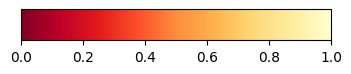

afmhot_r


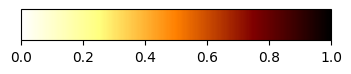

autumn_r


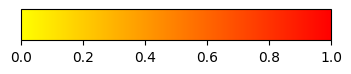

binary_r


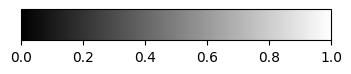

bone_r


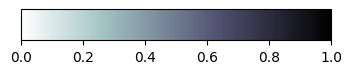

brg_r


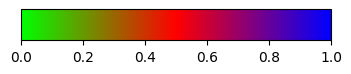

bwr_r


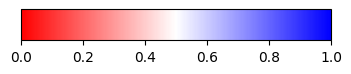

cool_r


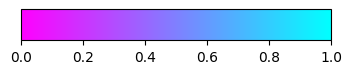

coolwarm_r


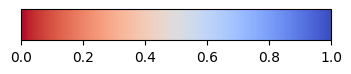

copper_r


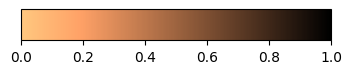

cubehelix_r


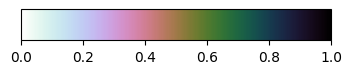

flag_r


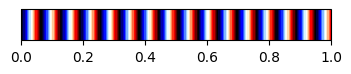

gist_earth_r


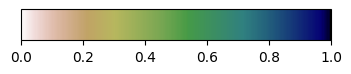

gist_gray_r


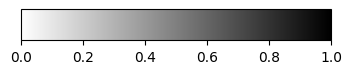

gist_heat_r


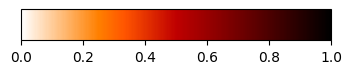

gist_ncar_r


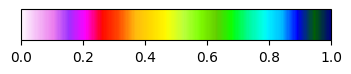

gist_rainbow_r


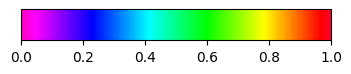

gist_stern_r


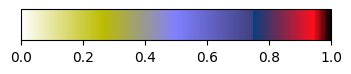

gist_yarg_r


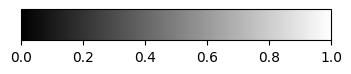

gnuplot_r


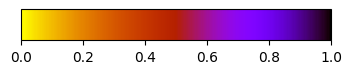

gnuplot2_r


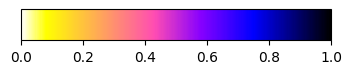

gray_r


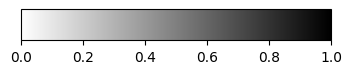

hot_r


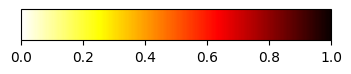

hsv_r


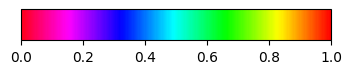

jet_r


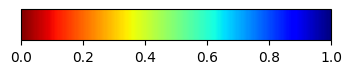

nipy_spectral_r


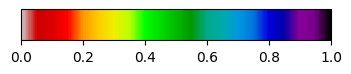

ocean_r


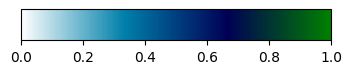

pink_r


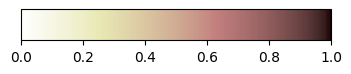

prism_r


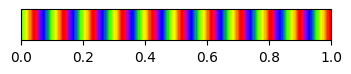

rainbow_r


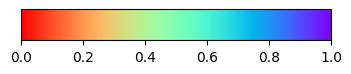

seismic_r


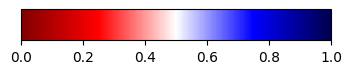

spring_r


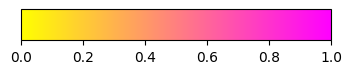

summer_r


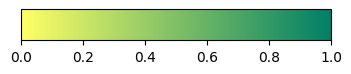

terrain_r


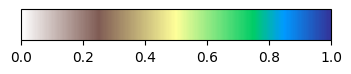

winter_r


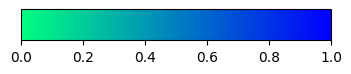

Accent_r


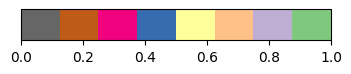

Dark2_r


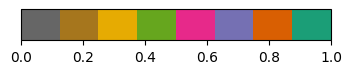

Paired_r


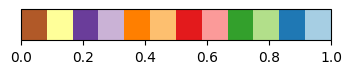

Pastel1_r


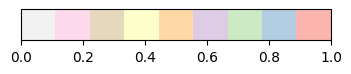

Pastel2_r


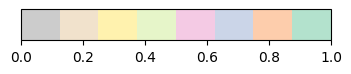

Set1_r


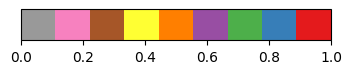

Set2_r


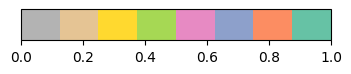

Set3_r


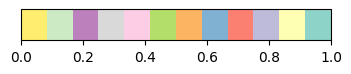

tab10_r


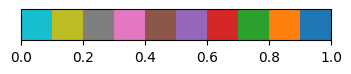

tab20_r


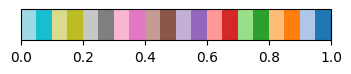

tab20b_r


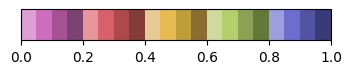

tab20c_r


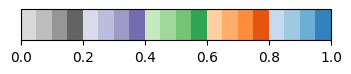

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_colorMaps(cmap):

    fig, ax = plt.subplots(figsize=(4,0.4))
    col_map = plt.get_cmap(cmap)
    mpl.colorbar.ColorbarBase(ax, cmap=col_map, orientation = 'horizontal')

    plt.show()

for cmap_id in plt.colormaps():
    print(cmap_id)
    plot_colorMaps(cmap_id)